In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import random
import sklearn as sk
from time import time
import pickle
from Lopacity import *

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from rand_pert import rand_pertub

In [5]:
g = nx.erdos_renyi_graph(n=200, p=0.15)

# Init graph 
degs = g.degree(g)
deg_count, opacity = init(g, degs)
# Prepare inverted opacity matrix:
inv_opacity = {}


In [3]:
face_orig = open("data/facebook-links.txt") 
f_arr = np.array(face_orig.readlines())
G = nx.Graph()

edgelist = []
for line in f_arr: 
    i, j, time = line.split('\t')
    edgelist.append((int(i), int(j)))

G.add_edges_from(edgelist)


### Split the graph

In [6]:
from attack import *

In [7]:
alpha = 0.25

In [8]:
G1, G2 = edge_split(g, 0.25)

In [9]:
# Naive anonimization
G_aux = G1
G_san = G2

In [14]:
# Randomized anonimization
M = 5
t = 2
G_aux = rand_pertub(G1, M, t)
G_san = rand_pertub(G2, M, t)

In [15]:
X, Y = gen_trainset(G_aux, G_san, alpha, "data/test.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0.09813084112149532
Finished : 0.19626168224299065
Finished : 0.29439252336448596
Finished : 0.3925233644859813
Finished : 0.49065420560747663
Finished : 0.5887850467289719
Finished : 0.6869158878504673
Finished : 0.7850467289719626
Finished : 0.883177570093458
Finished : 0.9813084112149533
Start adding false examples
Finished : 0.0
Finished : 0.09836065573770492
Finished : 0.19672131147540983
Finished : 0.29508196721311475
Finished : 0.39344262295081966
Finished : 0.4918032786885246
Finished : 0.5901639344262295
Finished : 0.6885245901639344
Finished : 0.7868852459016393
Finished : 0.8852459016393442
Finished : 0.9836065573770492
Aux finished 0.4867820739746094 sec
Start adding positive examples
Finished : 0.09966777408637874
Finished : 0.19933554817275748
Finished : 0.29900332225913623
Finished : 0.39867109634551495
Finished : 0.4983388704318937
Finished : 0.5980066445182725
Finished : 0.6976744186046512
Finished : 

In [16]:
%%time
forest = RandomForestClassifier(n_estimators = 400, n_jobs=8)
forest.fit(X, Y)

CPU times: user 1.34 s, sys: 182 ms, total: 1.52 s
Wall time: 1.4 s


In [17]:
X_t, Y_t = gen_testset(G_aux, G_san, "data/test_test.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0.09183673469387756
Finished : 0.1836734693877551
Finished : 0.2755102040816326
Finished : 0.3673469387755102
Finished : 0.45918367346938777
Finished : 0.5510204081632653
Finished : 0.6428571428571429
Finished : 0.7346938775510204
Finished : 0.826530612244898
Finished : 0.9183673469387755
Start adding false examples
Finished : 0.0
Finished : 0.09183673469387756
Finished : 0.1836734693877551
Finished : 0.2755102040816326
Finished : 0.3673469387755102
Finished : 0.45918367346938777
Finished : 0.5510204081632653
Finished : 0.6428571428571429
Finished : 0.7346938775510204
Finished : 0.826530612244898
Finished : 0.9183673469387755
Test set generated in  0.7675600051879883 sec


In [18]:
forest.score(X_t, Y_t)

0.59693877551020413

In [22]:
## Apply anonimization
def anonimize(G):
    return G
G_aux = anonimize(G1)
G_san = anonimize(G2)

In [39]:
L = 2
theta = 0.5

In [40]:
def anonimize(g):
    t1 = time()
    result_optval2 = intersect_anonimize(g, L, theta, score='opt2', mode = 'val')
    tot_time = time()-t1
    print("Total time "+ str(tot_time))

    g1 = result_optval2['new_graph']
    dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
    print("Distortion "+ str(dist))
    return g1

In [42]:
def anonimize_orig(g):
    t1 = time()
    result_lomax = anonimize_lopacity(g=g, L=L, theta=theta, mode='max')
    print("Total time "+ str(time()-t1))

    # Storing results:
    g1 = result_lomax['new_graph']
    dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
    print("Distortion "+ str(dist))
    return g1

In [72]:
G_aux = anonimize(G1)

Edges removed: 
[(6, 144)]
Edges removed: 
[(13, 123)]
Edges removed: 
[(13, 87)]
Edges removed: 
[(5, 104)]
Edges removed: 
[(15, 198)]
Edges removed: 
[(0, 198)]
Edges removed: 
[(2, 135)]
Edges removed: 
[(4, 135)]
Edges removed: 
[(0, 156)]
Edges removed: 
[(2, 144)]
Edges removed: 
[(2, 155)]
Edges removed: 
[(2, 198)]
Edges removed: 
[(3, 173)]
Edges removed: 
[(24, 29)]
Edges removed: 
[(19, 106)]
Edges removed: 
[(12, 135)]
Edges removed: 
[(2, 156)]
Edges removed: 
[(3, 156)]
Edges removed: 
[(20, 156)]
Edges removed: 
[(19, 156)]
Edges removed: 
[(2, 191)]
Edges removed: 
[(5, 191)]
Edges removed: 
[(47, 198)]
Edges removed: 
[(15, 170)]
Edges removed: 
[(24, 156)]
Edges removed: 
[(8, 135)]
Edges removed: 
[(2, 48)]
Edges removed: 
[(24, 3)]
Edges removed: 
[(15, 191)]
Edges removed: 
[(5, 69)]
Edges removed: 
[(0, 141)]
Edges removed: 
[(18, 141)]
Edges removed: 
[(12, 141)]
Edges removed: 
[(9, 141)]
Edges removed: 
[(4, 32)]
Edges removed: 
[(7, 84)]
Edges removed: 
[(17,

In [73]:
G_san = anonimize(G2)

Edges removed: 
[(35, 75)]
Edges removed: 
[(51, 167)]
Edges removed: 
[(35, 128)]
Edges removed: 
[(21, 195)]
Edges removed: 
[(58, 178)]
Edges removed: 
[(15, 151)]
Edges removed: 
[(22, 97)]
Edges removed: 
[(2, 169)]
Edges removed: 
[(6, 124)]
Edges removed: 
[(47, 198)]
Edges removed: 
[(30, 186)]
Edges removed: 
[(41, 120)]
Edges removed: 
[(4, 110)]
Edges removed: 
[(12, 160)]
Edges removed: 
[(43, 28)]
Edges removed: 
[(6, 144)]
Edges removed: 
[(18, 168)]
Edges removed: 
[(19, 134)]
Edges removed: 
[(56, 186)]
Edges removed: 
[(11, 34)]
Edges removed: 
[(4, 135)]
Edges removed: 
[(27, 7)]
Edges removed: 
[(84, 134)]
Edges removed: 
[(15, 149)]
Edges removed: 
[(1, 35)]
Edges removed: 
[(46, 160)]
Edges removed: 
[(71, 121)]
Edges removed: 
[(33, 68)]
Edges removed: 
[(68, 165)]
Edges removed: 
[(0, 198)]
Edges removed: 
[(74, 66)]
Edges removed: 
[(41, 118)]
Edges removed: 
[(4, 9)]
Edges removed: 
[(5, 86)]
Edges removed: 
[(83, 167)]
Edges removed: 
[(67, 167)]
Edges removed

In [12]:
str(G_aux.number_of_edges())+  ' vs '  +  str(G_san.number_of_edges())

'956 vs 1271'

### Train data

In [32]:
from sklearn.metrics import roc_curve, auc
y_score = forest.predict_proba(test_set)
y_true = test_labels
fpr, tpr, thresholds = roc_curve(y_true, y_score[:, 1])
roc_auc = auc(fpr, tpr)

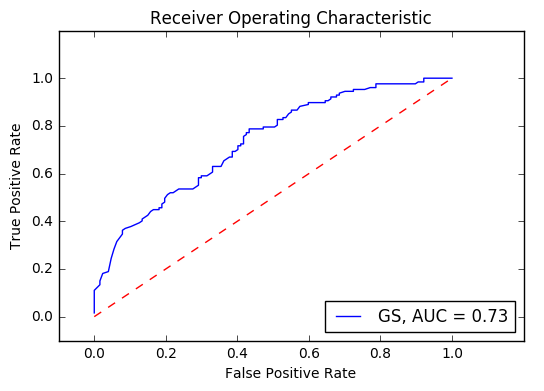

In [21]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='GS, AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
from sklearn.metrics import roc_curve, auc
y_score = forest.predict_proba(test_set)
y_true = test_labels
fpr, tpr, thresholds = roc_curve(y_true, y_score[:, 1])
roc_auc = auc(fpr, tpr)

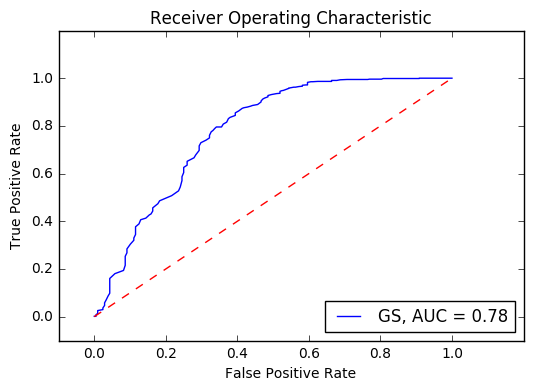

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='GS, AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()